In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go


# Data comes from COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University: 
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [2]:
world = pd.read_csv('../data/time_series_covid19_confirmed_global.csv')

In [3]:
world.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35


# Sweden and countries with similar strategy + Poland

In [40]:
similar_strategy = world[world['Country/Region'].isin(['Sweden', 'Netherlands', 'Switzerland', 'Poland', 'United Kingdom'])]

In [41]:
# Remove Provinces and Lat, Long 
similar_strategy = similar_strategy[similar_strategy.isnull().any(axis=1)]
similar_strategy = similar_strategy.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [42]:
# Forward to first cases in Sweden and United Kingdom 
cols = [i for i in range(1, 9)]
similar_strategy.drop(similar_strategy.columns[cols],axis=1,inplace=True)

In [39]:
similar_strategy

,Country/Region,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
169,Netherlands,0,0,0,0,0,0,0,0,0,...,36535,37190,37845,38245,38416,38802,39316,39791,40236,40571
183,Poland,0,0,0,0,0,0,0,0,0,...,10892,11273,11617,11902,12218,12640,12877,13105,13375,13693
205,Sweden,0,1,1,1,1,1,1,1,1,...,17567,18177,18640,18926,19621,20302,21092,21520,22082,22317
206,Switzerland,0,0,0,0,0,0,0,0,0,...,28677,28894,29061,29164,29264,29407,29586,29705,29817,29905
223,United Kingdom,0,2,2,2,2,2,2,2,3,...,143464,148377,152840,157149,161145,165221,171253,177454,182260,186599


In [44]:
# Change format from wide to long for plotting
similar_strategy_long = pd.melt(similar_strategy, id_vars=['Country/Region'] ,var_name='Date', value_name='Number of cases')
# Change data column for time series
similar_strategy_long['Date'] = similar_strategy_long['Date'].astype('datetime64[ns]')

In [122]:
similar_strategy_relative = pd.DataFrame.copy(similar_strategy, deep=True)
similar_strategy_relative.iloc[0, 1:] = similar_strategy_relative.iloc[0, 1:].apply(lambda x: x/17.28) #Netherlands
similar_strategy_relative.iloc[1, 1:] = similar_strategy_relative.iloc[2, 1:].apply(lambda x: x/37.97) #Poland
similar_strategy_relative.iloc[2, 1:] = similar_strategy_relative.iloc[2, 1:].apply(lambda x: x/10.23) #Sweden
similar_strategy_relative.iloc[3, 1:] = similar_strategy_relative.iloc[3, 1:].apply(lambda x: x/8.57) #Switzerland
similar_strategy_relative.iloc[4, 1:] = similar_strategy_relative.iloc[4, 1:].apply(lambda x: x/66.65) #UK

In [123]:
similar_strategy_relative_long = pd.melt(similar_strategy_relative, id_vars=['Country/Region'] ,var_name='Date', value_name='Number of cases')
similar_strategy_relative_long['Date'] = similar_strategy_relative_long['Date'].astype('datetime64[ns]')

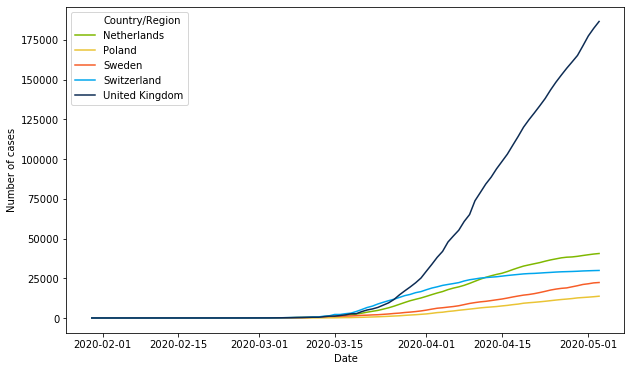

In [124]:
plt.figure(figsize=(10,6))
colors = {
    "Netherlands":"#7FB800",
    "Poland":"#EAC435",
    "Sweden":"#F75D28",
    "Switzerland":"#00A6ED",
    "United Kingdom": "#0D2C54",
}
ax = sns.lineplot(x='Date', y='Number of cases', data=similar_strategy_long, hue='Country/Region', palette=colors)

In [141]:
similar_strategy_long = similar_strategy_long.rename(columns = {'Country/Region': 'Entity', 'Number of cases': 'Number'})
tests = tests.rename(columns = {'Total tests': 'Number'})

In [148]:
tests

,Entity,Code,Date,Number
2198,Netherlands,NLD,2020-03-15,17080
2199,Netherlands,NLD,2020-03-22,38418
2200,Netherlands,NLD,2020-03-29,63163
2201,Netherlands,NLD,2020-04-05,92261
2202,Netherlands,NLD,2020-04-12,131221
...,...,...,...,...
3690,United Kingdom,GBR,2020-04-28,599339
3691,United Kingdom,GBR,2020-04-29,632794
3692,United Kingdom,GBR,2020-04-30,687369
3693,United Kingdom,GBR,2020-05-01,762279


In [149]:
# create figure
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=similar_strategy_long[(similar_strategy_long["Entity"] == "Netherlands")]['Date'],
        y=similar_strategy_long[(similar_strategy_long["Entity"] == "Netherlands")]["Number"],
        mode='lines',
        name="Netherlands",
        marker=dict(color="#7FB800")
    )
                     )

fig.add_trace(go.Scatter(
        x=similar_strategy_long[(similar_strategy_long["Entity"] == "Poland")]['Date'],
        y=similar_strategy_long[(similar_strategy_long["Entity"] == "Poland")]["Number"],
        mode='lines',
        name="Poland",
        marker=dict(color="#EAC435")
    )
                     )
                                    
fig.add_trace(go.Scatter(
        x=similar_strategy_long[(similar_strategy_long["Entity"] == "Sweden")]['Date'],
        y=similar_strategy_long[(similar_strategy_long["Entity"] == "Sweden")]["Number"],
        mode='lines',
        name="Sweden",
        marker=dict(color="#F75D28")
    )
                     )
                                    
fig.add_trace(go.Scatter(
        x=similar_strategy_long[(similar_strategy_long["Entity"] == "Switzerland")]['Date'],
        y=similar_strategy_long[(similar_strategy_long["Entity"] == "Switzerland")]["Number"],
        mode='lines',
        name="Switzerland",
        marker=dict(color="#00A6ED")
    )
                     )
                                
fig.add_trace(go.Scatter(
        x=similar_strategy_long[(similar_strategy_long["Entity"] == "United Kingdom")]['Date'],
        y=similar_strategy_long[(similar_strategy_long["Entity"] == "United Kingdom")]["Number"],
        mode='lines',
        name="United Kingdom",
        marker=dict(color="#0D2C54")
    )
             )


fig.update_layout(
    width=900,
    height=600,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template='plotly_white',
    xaxis_title = 'Date',
    yaxis_title = 'Number'
)
                                    
    
buttons = []

for name, df, y_title in zip(
    ['Number of cases', 'Number of tests'],
    [similar_strategy_long, tests],
    ['Number of cases', 'Number of tests']
):
    
    buttons.append(dict(method='update',
                        label=name,
                        visible=True,
                        args=[{'x': [
                            df[(df["Entity"] == "Netherlands")]['Date'],
                            df[(df["Entity"] == "Poland")]['Date'],
                            df[(df["Entity"] == "Sweden")]['Date'],
                            df[(df["Entity"] == "Switzerland")]['Date'],
                            df[(df["Entity"] == "United Kingdom")]['Date'],
                        ],
                               'y': [
                            df[(df["Entity"] == "Netherlands")]['Number'],
                            df[(df["Entity"] == "Poland")]['Number'],
                            df[(df["Entity"] == "Sweden")]['Number'],
                            df[(df["Entity"] == "Switzerland")]['Number'],
                            df[(df["Entity"] == "United Kingdom")]['Number'],
                        ]
                    },
                             {
                                 'yaxis': {'title': y_title}
                    }],
                            )
                  )
    
updatemenu = []
your_menu=dict()
updatemenu.append(your_menu)

updatemenu[0] = dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.15,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )

fig.update_layout(showlegend=True, updatemenus=updatemenu)


fig.update_layout(
    annotations=[
        dict(text="Y axis:", showarrow=False,
        x=0, y=1.06, xref="paper", yref="paper", align="left")
    ]
)

fig.show()
# fig.write_html("plotly_plot1.html")

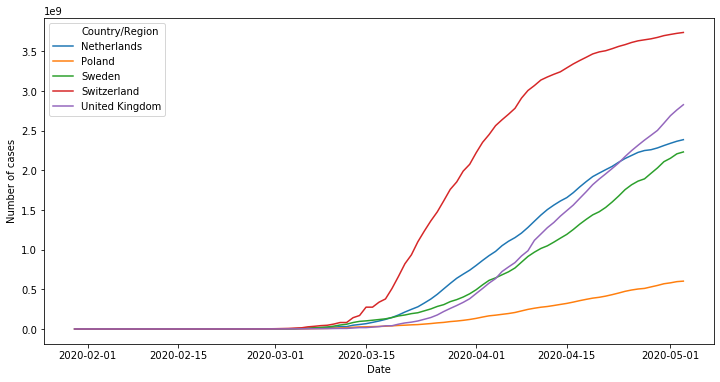

In [117]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='Date', y='Number of cases', data=similar_strategy_relative_long, hue='Country/Region')

In [343]:
selected_countries_provinces2 = world[world['Country/Region'].isin(['Sweden', 'Denmark', 'Finland', 'Norway'])]

In [344]:
selected_countries_provinces2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
92,Faroe Islands,Denmark,61.8926,-6.9118,0,0,0,0,0,0,...,187,187,187,187,187,187,187,187,187,187
93,Greenland,Denmark,71.7069,-42.6043,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
94,NaN,Denmark,56.2639,9.5018,0,0,0,0,0,0,...,8210,8445,8575,8698,8851,9008,9158,9311,9407,9523
106,NaN,Finland,64.0000,26.0000,0,0,0,0,0,0,...,4395,4475,4576,4695,4740,4906,4995,5051,5176,5254
175,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,7463,7499,7527,7599,7660,7710,7738,7783,7809,7847
205,NaN,Sweden,63.0000,16.0000,0,0,0,0,0,0,...,17567,18177,18640,18926,19621,20302,21092,21520,22082,22317


In [383]:
selected_countries2 = selected_countries_provinces2[selected_countries_provinces2.isnull().any(axis=1)]
selected_countries2 = selected_countries2.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [384]:
selected_countries2.drop(selected_countries.columns[cols],axis=1,inplace=True)

In [385]:
selected_countries2

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
94,Denmark,0,0,0,0,0,0,0,0,0,...,23,23,35,90,262,9008,9158,9311,9407,9523
106,Finland,0,0,0,0,0,0,0,1,1,...,15,15,23,30,40,4906,4995,5051,5176,5254
175,Norway,0,0,0,0,0,0,0,0,0,...,108,147,176,205,400,7710,7738,7783,7809,7847
205,Sweden,0,0,0,0,0,0,0,0,0,...,101,161,203,248,355,20302,21092,21520,22082,22317


In [386]:
selected_countries2.iloc[0, 1:] = selected_countries2.iloc[0, 1:].apply(lambda x: (x*1e6)/5,806*1e6) #Denmark
selected_countries2.iloc[1, 1:] = selected_countries2.iloc[1, 1:].apply(lambda x: (x*1e6)/5,518*1e6) #Finland
selected_countries2.iloc[2, 1:] = selected_countries2.iloc[2, 1:].apply(lambda x: (x*1e6)/5,368*1e6) #Norway
selected_countries2.iloc[3, 1:] = selected_countries2.iloc[3, 1:].apply(lambda x: (x*1e6)/10,23*1e6) #Sweden
                         

In [387]:
selected_countries2_long = pd.melt(selected_countries2, id_vars=['Country/Region'] ,var_name='Date', value_name='Number of cases')
selected_countries2_long['Date'] = selected_countries2_long['Date'].astype('datetime64[ns]')

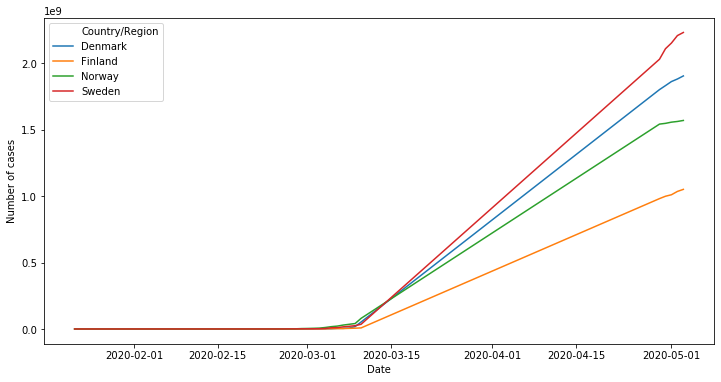

In [388]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='Date', y='Number of cases', data=selected_countries2_long, hue='Country/Region')

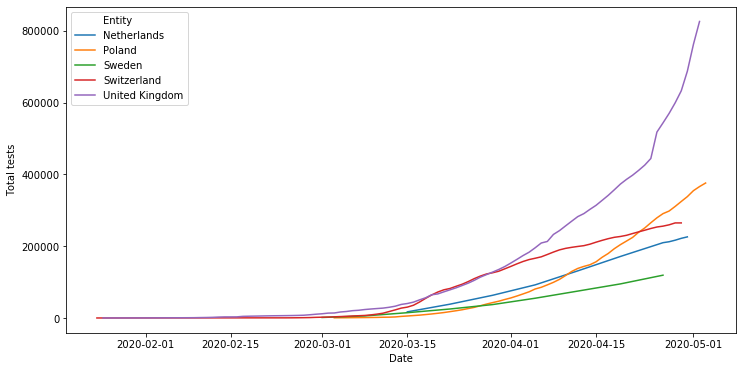

In [133]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='Date', y='Total tests', data=tests, hue='Entity')

In [134]:
tests[tests['Entity'] == 'Netherlands']['Total tests'] = tests[tests['Entity'] == 'Netherlands']['Total tests'].apply(lambda x: (x*1e6)/17,28*1e6) #Netherlands
tests[tests['Entity'] == 'Poland']['Total tests'] = tests[tests['Entity'] == 'Poland']['Total tests'].apply(lambda x: (x*1e6)/37,97*1e6) #Poland
tests[tests['Entity'] == 'Sweden']['Total tests'] = tests[tests['Entity'] == 'Sweden']['Total tests'].apply(lambda x: (x*1e6)/10,23*1e6) #Sweden
tests[tests['Entity'] == 'Switzerland']['Total tests'] = tests[tests['Entity'] == 'Switzerland']['Total tests'].apply(lambda x: (x*1e6)/8,57*1e6) #Switzerland
tests[tests['Entity'] == 'UK']['Total tests'] = tests[tests['Entity'] == 'UK']['Total tests'].apply(lambda x: (x*1e6)/66,65*1e6) #UK


/home/paulina/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/paulina/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/paulina/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [600]:
tests[tests['Entity'] == 'UK']

,Entity,Code,Date,Total tests


In [601]:
tests = tests.reset_index()

netherland_indexes = tests[tests['Entity'] == 'Netherlands']['Total tests'].index.values
tests.iloc[netherland_indexes, 4] = tests.iloc[netherland_indexes, 4].apply(lambda x: (x*1e6)/17,28*1e6)  #Netherlands

poland_indexes = tests[tests['Entity'] == 'Poland']['Total tests'].index.values
tests.iloc[poland_indexes, 4] = tests.iloc[poland_indexes, 4].apply(lambda x: (x*1e6)/37,97*1e6) #Poland


switzerland_indexes = tests[tests['Entity'] == 'Switzerland']['Total tests'].index.values
tests.iloc[switzerland_indexes, 4] = tests.iloc[switzerland_indexes, 4].apply(lambda x: (x*1e6)/8,57*1e6) #Switzerland

sweden_indexes = tests[tests['Entity'] == 'Sweden']['Total tests'].index.values
tests.iloc[sweden_indexes, 4] = tests.iloc[sweden_indexes, 4].apply(lambda x: (x*1e6)/10,23*1e6) #Sweden


uk_indexes = tests[tests['Entity'] == 'United Kingdom']['Total tests'].index.values
tests.iloc[uk_indexes, 4] = tests.iloc[uk_indexes, 4].apply(lambda x: (x*1e6)/66,65*1e6) #UK







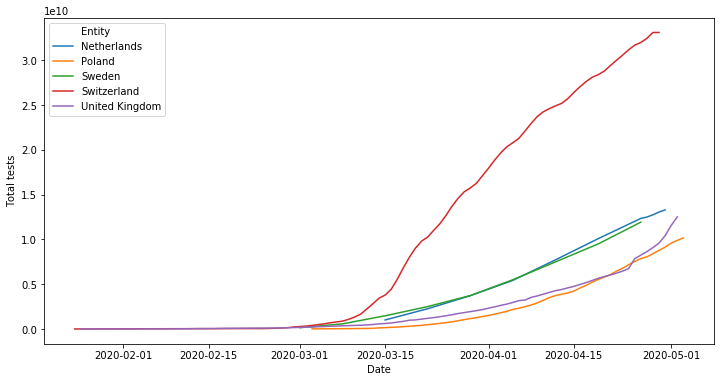

In [602]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='Date', y='Total tests', data=tests, hue='Entity')